In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from tensorflow.keras import Sequential, layers, models
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping



In [21]:
y_labels = pd.read_csv("data/sentence_transformers_clusters_2.csv")
X_train = np.load("C:\\Users\\Admin\\Documents\\MindSee\\data\\nsd_train_fmriavg_nsdgeneral_sub1.npy")
X_test = np.load("C:\\Users\\Admin\\Documents\\MindSee\\data\\nsd_test_fmriavg_nsdgeneral_sub1.npy")

In [40]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
y_labels

,0,1,2,3,4,5,label,original_caption
0,9.630714,7.765681,8.996327,6.132091,3.909901,5.356290,19,A man standing on the beach beside surf board...
1,9.720460,8.712183,9.078218,4.606048,4.152843,4.773759,11,"A man on a surfboard, who is riding a wave. A ..."
2,9.524311,8.541946,9.202825,6.007106,3.576740,5.644311,44,A group of people are sitting on the beach...
3,9.952086,9.753232,9.763308,12.532373,0.350290,7.167182,16,A shower and a white toilet in a small bathroo...
4,10.107516,9.736267,-0.072490,7.156481,5.054887,5.928072,3,two grown zebra inside some kind of enclosure
...,...,...,...,...,...,...,...,...
8854,9.584170,7.442978,8.991532,6.442805,3.899534,5.466592,19,A person walks on a bridge with a kite.
8855,10.455362,10.638555,7.110577,10.253338,5.931999,6.412370,14,a couple of cats are laying on a black couch
8856,9.728570,8.418761,8.720880,4.748608,4.403027,4.790366,11,THERE IS A PERSON THAT IS RIDING THE WAVES O...
8857,9.643808,7.381854,9.245078,6.702313,3.639144,5.582964,19,Several people are flying kites on a large...


In [43]:
# y_labels.drop(columns = ["Unnamed: 0"], inplace = True)

In [44]:
y = y_labels['label'].values

In [45]:
X_train.shape

(8859, 15724)

In [46]:
len(set(y))

45

In [47]:

# Split the dataset into training and testing sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [48]:
X_train_new.shape

(7087, 15724)

In [37]:
# Create the DNN model
model = Sequential()

# Add input layer
model.add(Dense(1000, input_dim=X_train_new.shape[1], activation='relu'))


# Add hidden layers
model.add(Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(1000, activation='relu'))



model.add(Dense(2000, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(100, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(Dense(45, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights = True)

# Train the model with early stopping
history = model.fit(X_train_new, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
178/178 [==============================] - 2s 9ms/step - loss: 190.5758 - accuracy: 0.0305 - val_loss: 3.7929 - val_accuracy: 0.0296
Epoch 2/100
178/178 [==============================] - 1s 8ms/step - loss: 4.3368 - accuracy: 0.0437 - val_loss: 3.7814 - val_accuracy: 0.0430
Epoch 3/100
178/178 [==============================] - 1s 8ms/step - loss: 3.8785 - accuracy: 0.0457 - val_loss: 3.7730 - val_accuracy: 0.0430
Epoch 4/100
178/178 [==============================] - 1s 8ms/step - loss: 3.9515 - accuracy: 0.0460 - val_loss: 3.7669 - val_accuracy: 0.0430
Epoch 5/100
178/178 [==============================] - 1s 8ms/step - loss: 3.7961 - accuracy: 0.0453 - val_loss: 3.7622 - val_accuracy: 0.0430
Epoch 6/100
178/178 [==============================] - 1s 8ms/step - loss: 3.8878 - accuracy: 0.0453 - val_loss: 3.7590 - val_accuracy: 0.0430
Epoch 7/100
178/178 [==============================] - 1s 8ms/step - loss: 3.7699 - accuracy: 0.0452 - val_loss: 3.7567 - val_accuracy: 0.04

In [32]:
from xgboost import XGBClassifier

In [ ]:
model_xgb= XGBClassifier()
model_xgb.fit(X_train_new, y_train)

In [33]:
y

array([19, 11, 44, ..., 11, 19, 19], dtype=int64)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_new,y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
y_pred = model_knn.predict(X_test_new)

In [51]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.16478555304740405


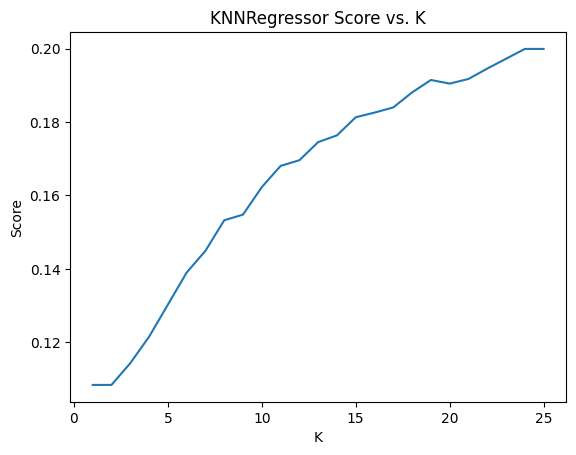

In [53]:
k_values = range(1, 26)
scores = []

from sklearn.model_selection import cross_val_score
for k in k_values:
   
    knn = KNeighborsClassifier(n_neighbors=k)
    
    
    score = np.mean(cross_val_score(knn, X_train_new, y_train, cv=5))
    scores.append(score)
    
import matplotlib.pyplot as plt
plt.plot( k_values, scores)
plt.xlabel('K')
plt.ylabel('Score')
plt.title('KNNRegressor Score vs. K')
plt.show()